In [5]:
!pip install ml_metrics

  Using cached ml_metrics-0.1.4.tar.gz (5.0 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in ml_metrics setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
!python3.9 -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.5 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2


In [745]:
import pandas as pd
import warnings
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import *
import seaborn as sns

In [81]:
warnings.filterwarnings("ignore")

In [708]:
data = pd.read_csv("train-2.csv")

In [709]:
data

,user_id,course_id
0,39972,34
1,56815,51
2,63734,20
3,17896,81
4,36961,64
...,...,...
10267,10520,10
10268,62231,40
10269,150361,148
10270,4182,7


,user_id,course_id
0,39972,34
1,56815,51
2,63734,20
3,17896,81
4,36961,64
...,...,...
10267,10520,10
10268,62231,40
10269,150361,148
10270,4182,7


In [710]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    10272 non-null  int64
 1   course_id  10272 non-null  int64
dtypes: int64(2)
memory usage: 160.6 KB


In [711]:
data.user_id.nunique()

4862

In [712]:
data.course_id.nunique()

171

In [713]:
data.pivot_table(index=['user_id'], values='course_id')

,course_id
user_id,
4,4.50
78,100.00
81,74.25
83,67.00
84,58.50
...,...
186582,238.00
186668,238.00
186835,238.00


In [714]:
data.loc[data.user_id == 5318].course_id

119       1
6016    164
Name: course_id, dtype: int64

In [715]:
data_all = {i: [] for i in data.course_id.unique()}

In [716]:
for i in data.user_id.unique():
    data_loc = data.loc[data.user_id == i].course_id
    for j in data_loc:
        data_all[j] += list(data_loc)

In [717]:
for i in data_all.keys():
    data_all[i] = set([j for j in data_all[i] if j != i])

In [718]:
data_all

{34: {1,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  13,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  28,
  29,
  30,
  32,
  33,
  40,
  41,
  43,
  51,
  56,
  59,
  68,
  69,
  72,
  73,
  74,
  75,
  76,
  77,
  80,
  81,
  85,
  86,
  88,
  90,
  91,
  92,
  93,
  94,
  97,
  99,
  100,
  101,
  102,
  103,
  106,
  108,
  109,
  110,
  111,
  114,
  116,
  117,
  120,
  121,
  127,
  129,
  130,
  131,
  134,
  137,
  138,
  141,
  142,
  143,
  144,
  146,
  147,
  148,
  158,
  164,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  177,
  178,
  184,
  188,
  189,
  190,
  191,
  194,
  195,
  196,
  199,
  202,
  204,
  221,
  228,
  237,
  238,
  246},
 51: {1,
  3,
  5,
  6,
  7,
  8,
  9,
  10,
  13,
  14,
  15,
  18,
  20,
  21,
  23,
  24,
  25,
  28,
  29,
  31,
  32,
  33,
  34,
  40,
  41,
  43,
  50,
  56,
  58,
  59,
  64,
  68,
  69,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  80,
  81,
  85,
  86,
  87,
  88,
  90,
  91,
  92,
  93,
  94,
  

In [719]:
data_test = pd.DataFrame(columns=["index"] + list(data.course_id.unique()))
# data_test = data_test.set_index("index")

In [720]:
data_test

,index,34,51,20,81,64,7,72,5,13,...,160,176,224,17,104,123,220,147,153,183


In [721]:
columns = list(data_test.columns)
for i in data_all.keys():
    data_join = {}
    for j in columns:
        if j == "index":
            data_join["index"] = i
        elif i == j:
            data_join[j] = -1
        else:
            if j in data_all[i]:
                if j in data_join.keys():
                    data_join[j] += 1
                else:
                    data_join[j] = 1
            else:
                if j not in data_join.keys():
                    data_join[j] = 0
    data_test = data_test.append(data_join, ignore_index=True)

In [722]:
data_test

,index,34,51,20,81,64,7,72,5,13,...,160,176,224,17,104,123,220,147,153,183
0,34,-1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,51,1,-1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,1,0,0
2,20,1,1,-1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,1,0,0
3,81,1,1,1,-1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,64,0,1,1,1,-1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,18505,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,3041,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5193,10520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5194,150361,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,index,34,51,20,81,64,7,72,5,13,...,160,176,224,17,104,123,220,147,153,183
0,34,-1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,51,1,-1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,1,0,0
2,20,1,1,-1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,1,0,0
3,81,1,1,1,-1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,64,0,1,1,1,-1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,123,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
167,220,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
168,147,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,0,0
169,153,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0


In [723]:
data_test.set_index("index")

,34,51,20,81,64,7,72,5,13,134,...,160,176,224,17,104,123,220,147,153,183
index,,,,,,,,,,,,,,,,,,,,,
34,-1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
51,1,-1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,1,0,0
20,1,1,-1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,1,0,0
81,1,1,1,-1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
64,0,1,1,1,-1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,34,51,20,81,64,7,72,5,13,134,...,160,176,224,17,104,123,220,147,153,183
index,,,,,,,,,,,,,,,,,,,,,
34,-1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
51,1,-1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,1,0,0
20,1,1,-1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,1,0,0
81,1,1,1,-1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
64,0,1,1,1,-1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
147,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,0,0


In [724]:
recList= {}

In [725]:
data_test.to_excel('DataSet.xlsx')
df=pd.read_excel('DataSet.xlsx', index_col=0)

In [726]:
for row in df:
    print(row)
    matrix = df.corrwith(df[row])
    matrix = pd.DataFrame(matrix)
    result_matrix = matrix.copy()
    result_matrix = result_matrix.drop([row], axis=0)
    recList[row] = result_matrix.to_dict()[0]
    # for i in result_matrix:
    #     result = {j:  for j in result_matrix}
    #     for j in result_matrix[i]:
    #         print(j)
    #     name = result_matrix.idxmax().item()
    #     value = result_matrix[0][result_matrix.idxmax()]
    #     recList[row].append({str(name): float(value)})
        # tempMatr = result_matrix.drop([result_matrix.idxmax().item()], axis=0)


index
34
51
20
81
64
7
72
5
13
134
10
117
238
172
119
3
15
227
1
115
188
114
91
9
71
73
8
171
202
29
18
204
101
228
90
107
164
189
25
116
85
190
191
103
14
92
75
43
23
167
144
74
97
137
28
146
22
77
178
32
148
165
212
111
177
56
127
149
110
145
94
198
50
108
129
109
151
40
33
41
121
21
142
6
124
99
150
199
76
27
194
12
184
173
24
180
30
100
169
102
138
130
174
86
196
78
26
136
133
158
215
106
229
195
80
143
205
131
217
221
87
246
59
213
163
140
235
125
93
200
69
170
154
16
19
207
159
166
135
237
68
225
88
141
234
161
139
126
112
168
162
192
181
120
31
252
132
206
219
222
58
160
176
224
17
104
123
220
147
153
183


In [727]:
from pprint import pprint

In [728]:
pprint(recList)

{1: {3: 0.3653781642913223,
     5: 0.4338585271409679,
     6: 0.2508192017725048,
     7: 0.3858365380170194,
     8: 0.33659427691984983,
     9: 0.31589270950264164,
     10: 0.2738867884214716,
     12: 0.09713551557769412,
     13: 0.3089717397422176,
     14: 0.354233667447944,
     15: 0.33570551571011886,
     16: 0.005648685879392381,
     17: 0.04456695705350145,
     18: 0.38805700005813293,
     19: 0.09145946159729954,
     20: 0.4379013514824973,
     21: 0.28285348135529614,
     22: 0.1986935770237215,
     23: 0.44255248933464025,
     24: 0.4027439754175646,
     25: 0.3732865230433758,
     26: 0.0,
     27: 0.13127690100430442,
     28: 0.24590163934426257,
     29: 0.19703002639664272,
     30: 0.22319013239965424,
     31: 0.28923075592001923,
     32: 0.4027439754175648,
     33: 0.35757301086798166,
     34: 0.44776673559449554,
     40: 0.3101725807388365,
     41: 0.2576807327026387,
     43: 0.48611181857888935,
     50: 0.1568339505026993,
     51: 0.408105

In [729]:
answer = pd.read_csv("sample_submission.csv", index_col=0)

In [730]:
answer

,course_id_1,course_id_2,course_id_3
user_id,,,
78,0,0,0
81,0,0,0
120,0,0,0
123,0,0,0
150,0,0,0
...,...,...,...
185864,0,0,0
186262,0,0,0
186691,0,0,0


In [731]:
def get_the_best_one(numbers: list):
    if len(numbers) == 1:
        return list(sorted(recList[numbers[0]].keys(), key=lambda x: recList[numbers[0]][x], reverse=True))[:3]
    elif len(numbers) == 0:
        return random.choices(list(recList["index"].keys()), k=3)
    else:
        data_of_results = {}
        for i in numbers:
            k = 0
            for j in list(sorted(recList[i].keys(), key=lambda x: recList[i][x], reverse=True)):
                if j not in numbers:
                    if j in data_of_results.keys():
                        data_of_results[j] += recList[i][j]
                    else:
                        data_of_results[j] = recList[i][j]
                    k += 1
                if k == 3:
                    break
        return list(sorted(data_of_results.keys(), key=lambda x: data_of_results[x], reverse=True))[:3]


In [732]:
get_the_best_one([1, 129])

[34, 97, 73]

In [733]:
data_all_users = {i: [] for i in answer.index}

In [734]:
for i in answer.index:
    data_loc = data.loc[data.user_id == i].course_id
    data_all_users[i] += list(data_loc)

In [735]:
pprint(data_all_users)

{78: [100],
 81: [34, 188, 1, 74],
 120: [1, 129],
 123: [],
 150: [167],
 170: [20],
 171: [9, 3],
 188: [94, 7, 154, 24, 207, 1, 23, 81, 150, 31, 151],
 246: [18, 34],
 259: [3],
 296: [],
 307: [5, 189, 86, 108, 1, 15],
 309: [1, 129, 34, 85, 178],
 328: [20, 3],
 340: [129, 92, 1, 171],
 343: [1, 14],
 344: [],
 356: [16, 25, 34, 85, 108, 129],
 361: [1],
 363: [],
 368: [15, 34, 1],
 374: [34, 1],
 396: [18, 14],
 406: [7, 15],
 460: [],
 488: [],
 513: [1, 189],
 526: [9, 171, 194, 20, 74, 1, 34],
 529: [7, 221, 15, 127, 1, 13, 131, 34, 137, 114, 177],
 545: [1, 92],
 548: [43, 18, 20, 1],
 549: [],
 555: [9, 1],
 556: [15, 127, 85],
 563: [],
 566: [92, 18],
 570: [111, 1],
 581: [34, 51, 18],
 582: [129, 34, 13, 1],
 597: [1, 43, 76, 51, 177, 15, 92, 40],
 606: [51, 20],
 612: [1, 80],
 613: [108, 18, 91, 34, 20, 14, 51, 92],
 616: [14, 9, 7, 1],
 626: [92, 1, 91, 134],
 680: [1, 34],
 693: [],
 704: [],
 723: [34, 21, 77, 99, 24, 43, 3, 7, 90, 100, 81, 188, 1, 106],
 727: [85,

In [736]:
print(type(data_all_users))

<class 'dict'>


In [737]:
list(recList["index"].keys())

[34,
 51,
 20,
 81,
 64,
 7,
 72,
 5,
 13,
 134,
 10,
 117,
 238,
 172,
 119,
 3,
 15,
 227,
 1,
 115,
 188,
 114,
 91,
 9,
 71,
 73,
 8,
 171,
 202,
 29,
 18,
 204,
 101,
 228,
 90,
 107,
 164,
 189,
 25,
 116,
 85,
 190,
 191,
 103,
 14,
 92,
 75,
 43,
 23,
 167,
 144,
 74,
 97,
 137,
 28,
 146,
 22,
 77,
 178,
 32,
 148,
 165,
 212,
 111,
 177,
 56,
 127,
 149,
 110,
 145,
 94,
 198,
 50,
 108,
 129,
 109,
 151,
 40,
 33,
 41,
 121,
 21,
 142,
 6,
 124,
 99,
 150,
 199,
 76,
 27,
 194,
 12,
 184,
 173,
 24,
 180,
 30,
 100,
 169,
 102,
 138,
 130,
 174,
 86,
 196,
 78,
 26,
 136,
 133,
 158,
 215,
 106,
 229,
 195,
 80,
 143,
 205,
 131,
 217,
 221,
 87,
 246,
 59,
 213,
 163,
 140,
 235,
 125,
 93,
 200,
 69,
 170,
 154,
 16,
 19,
 207,
 159,
 166,
 135,
 237,
 68,
 225,
 88,
 141,
 234,
 161,
 139,
 126,
 112,
 168,
 162,
 192,
 181,
 120,
 31,
 252,
 132,
 206,
 219,
 222,
 58,
 160,
 176,
 224,
 17,
 104,
 123,
 220,
 147,
 153,
 183]

In [738]:
for i in list(data_all_users.keys()):
    print(i)
    answer.loc[i, ["course_id_1", "course_id_2", "course_id_3"]] = get_the_best_one(data_all_users[i])

78
81
120
123
150
170
171
188
246
259
296
307
309
328
340
343
344
356
361
363
368
374
396
406
460
488
513
526
529
545
548
549
555
556
563
566
570
581
582
597
606
612
613
616
626
680
693
704
723
727
800
805
812
828
843
849
894
901
904
969
1038
1100
1104
1158
1279
1286
1338
1352
1356
1361
1393
1395
1456
1466
1478
1483
1491
1516
1570
1573
1596
1631
1644
1650
1667
1697
1702
1710
1716
1717
1722
1730
1736
1737
1759
1762
1774
1776
1804
1844
1866
1894
1900
1954
1979
2003
2011
2016
2036
2093
2145
2149
2169
2243
2245
2287
2290
2340
2354
2376
2422
2451
2459
2465
2509
2622
2633
2639
2647
2667
2675
2679
2680
2684
2724
2725
2755
2762
2763
2785
2819
2820
2860
2888
2908
2918
2932
2949
2960
2994
3017
3018
3025
3091
3105
3110
3117
3127
3139
3167
3177
3189
3193
3260
3359
3397
3399
3408
3414
3452
3475
3479
3480
3487
3492
3497
3516
3529
3532
3550
3590
3591
3611
3618
3629
3662
3675
3698
3769
3809
3811
3816
3821
3865
3871
3915
3942
3962
3966
3972
3995
4012
4025
4042
4079
4111
4127
4128
4129
4156
4181
4182
42

In [739]:
answer

,course_id_1,course_id_2,course_id_3
user_id,,,
78,184,138,115
81,92,114,134
120,34,97,73
123,183,192,135
150,195,235,17
...,...,...,...
185864,161,97,110
186262,85,143,72
186691,142,34,159


In [740]:
answer.to_csv("answer.csv")

# def apk(actual, predicted, k=10):
#     if len(predicted)>k:
#         predicted = predicted[:k]
#
#     score = 0.0
#     num_hits = 0.0
#
#     for i,p in enumerate(predicted):
#         if p in actual and p not in predicted[:i]:
#             num_hits += 1.0
#             score += num_hits / (i+1.0)
#
#     if not actual:
#         return 1.0
#
#     return score / min(len(actual), k)

# def mapk(actual, predicted, k=10):
#     return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [342]:
pd.read_csv("answer.csv", index_col=0)

,course_id_1,course_id_2,course_id_3
user_id,,,
78,184,138,115
81,72,133,136
120,99,78,86
123,18,170,124
150,195,235,17
...,...,...,...
185864,198,19,207
186262,212,174,212
186691,50,56,77


# Попытка номер 2

In [353]:
model = KMeans(n_clusters=5)

model.fit(data)
all_predictions = model.predict(data)

In [354]:
all_predictions

array([4, 4, 2, ..., 3, 0, 3], dtype=int32)

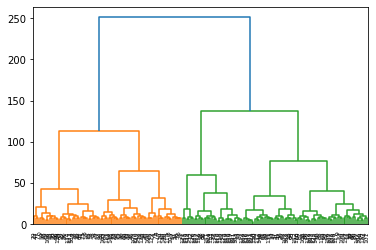

<Figure size 720x720 with 0 Axes>

In [357]:
samples = data_test.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.figure(figsize=(10, 10))
plt.show()

In [522]:
data_all_users = {i: [] for i in data.user_id.unique()}

In [523]:
data_test_users = pd.DataFrame(columns=["index"] + list(data.course_id.unique()))
# data_test = data_test.set_index("index")

In [524]:
for i in data.user_id.unique():
    data_all_users[i] = list(data.loc[data.user_id == i].course_id)

In [525]:
data_all_users.keys()

dict_keys([39972, 56815, 63734, 17896, 36961, 75452, 58294, 27277, 68308, 62349, 11072, 71376, 157346, 6450, 75127, 163349, 103560, 56897, 3698, 25500, 14227, 31926, 127840, 145247, 13543, 2541, 125368, 114900, 142981, 113972, 1631, 85678, 3399, 19409, 36035, 73151, 158139, 64322, 137614, 120185, 9638, 9416, 101968, 134131, 19150, 119970, 102000, 723, 6480, 20793, 129380, 23713, 12569, 39571, 25246, 76949, 2819, 32992, 12211, 24572, 138344, 168957, 4271, 132155, 45170, 7007, 169963, 1329, 38028, 81145, 67078, 81696, 68208, 616, 58766, 77335, 63269, 12482, 131031, 69079, 79933, 103313, 48263, 24022, 133771, 113150, 136375, 107408, 7411, 154898, 5040, 58360, 8105, 2496, 158056, 27160, 69212, 61572, 58349, 154345, 168459, 6867, 123100, 82718, 100365, 89326, 136219, 13148, 108306, 11622, 40198, 22638, 142441, 79828, 126476, 101530, 146333, 137786, 5318, 29709, 86761, 183021, 14064, 154203, 18034, 27200, 72816, 17225, 25800, 4300, 43947, 82851, 8369, 529, 136987, 174777, 181003, 6177, 10940

In [526]:
pprint(data_all_users)

{4: [8, 1],
 78: [100],
 81: [34, 188, 1, 74],
 83: [86, 114, 1],
 84: [25, 92],
 120: [1, 129],
 150: [167],
 170: [20],
 171: [9, 3],
 188: [94, 7, 154, 24, 207, 1, 23, 81, 150, 31, 151],
 201: [1],
 231: [1],
 246: [18, 34],
 249: [1],
 253: [25, 108, 13, 110, 5],
 259: [3],
 266: [1],
 285: [101, 20],
 307: [5, 189, 86, 108, 1, 15],
 309: [1, 129, 34, 85, 178],
 310: [1],
 313: [1, 138],
 328: [20, 3],
 332: [1, 91, 10],
 336: [1],
 340: [129, 92, 1, 171],
 343: [1, 14],
 356: [16, 25, 34, 85, 108, 129],
 361: [1],
 364: [1, 108],
 368: [15, 34, 1],
 374: [34, 1],
 375: [1],
 396: [18, 14],
 406: [7, 15],
 412: [1],
 471: [121, 7],
 482: [1],
 513: [1, 189],
 526: [9, 171, 194, 20, 74, 1, 34],
 529: [7, 221, 15, 127, 1, 13, 131, 34, 137, 114, 177],
 545: [1, 92],
 547: [114, 10, 7, 3],
 548: [43, 18, 20, 1],
 555: [9, 1],
 556: [15, 127, 85],
 566: [92, 18],
 570: [111, 1],
 581: [34, 51, 18],
 582: [129, 34, 13, 1],
 587: [1, 34],
 597: [1, 43, 76, 51, 177, 15, 92, 40],
 606: [51,

In [527]:
columns = list(data_test_users.columns)
for i in data_all_users.keys():
    data_join = {}
    for j in columns:
        if j == "index":
            data_join["index"] = i
        elif j in data_all_users[i]:
            data_join[j] = 1
        else:
            data_join[j] = 0

    data_test_users = data_test_users.append(data_join, ignore_index=True)

In [528]:
data_test_users

,index,34,51,20,81,64,7,72,5,13,...,160,176,224,17,104,123,220,147,153,183
0,39972,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56815,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,63734,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17896,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,36961,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,18505,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4858,3041,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4859,10520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4860,150361,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [529]:
data_test_users.set_index("index")

,34,51,20,81,64,7,72,5,13,134,...,160,176,224,17,104,123,220,147,153,183
index,,,,,,,,,,,,,,,,,,,,,
39972,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56815,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63734,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17896,0,1,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
36961,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [530]:
data_test_users.reset_index(drop=True)

,index,34,51,20,81,64,7,72,5,13,...,160,176,224,17,104,123,220,147,153,183
0,39972,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56815,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,63734,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17896,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,36961,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,18505,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4858,3041,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4859,10520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4860,150361,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [531]:
data_test_users.drop("index", axis=1).columns

Index([ 34,  51,  20,  81,  64,   7,  72,   5,  13, 134,
       ...
       160, 176, 224,  17, 104, 123, 220, 147, 153, 183],
      dtype='object', length=171)

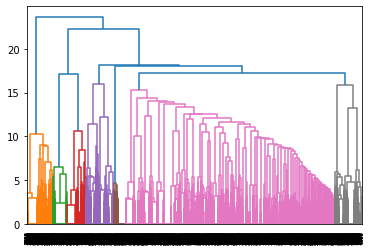

<Figure size 720x720 with 0 Axes>

In [532]:
samples = data_test_users.drop("index", axis=1).values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, 'ward', 'euclidean')

dendrogram(mergings)
plt.figure(figsize=(10, 10))
plt.show()

In [533]:
data_test_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Columns: 172 entries, index to 183
dtypes: object(172)
memory usage: 6.4+ MB


In [534]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 172 entries, index to 183
dtypes: object(172)
memory usage: 229.9+ KB


In [535]:
data.user_id.nunique()

4862

In [536]:
link = linkage(data_test_users.drop("index", axis=1), 'ward', 'euclidean')

In [537]:
dist = link[:, 2]
dist

array([ 0.        ,  0.        ,  0.        , ..., 18.12906593,
       22.31201569, 23.65299757])

Text(0, 0.5, 'Distance')

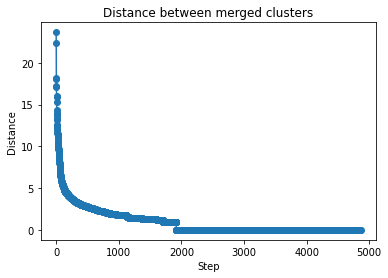

In [538]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')


In [539]:
link = linkage(data_test_users.drop("index", axis=1), 'ward', 'euclidean')

In [540]:
link[:10]

array([[0.000e+00, 9.300e+01, 0.000e+00, 2.000e+00],
       [1.000e+00, 1.300e+01, 0.000e+00, 2.000e+00],
       [2.000e+00, 1.120e+02, 0.000e+00, 2.000e+00],
       [5.900e+01, 2.295e+03, 0.000e+00, 2.000e+00],
       [1.482e+03, 2.855e+03, 0.000e+00, 2.000e+00],
       [2.730e+02, 4.863e+03, 0.000e+00, 3.000e+00],
       [4.170e+02, 5.590e+02, 0.000e+00, 2.000e+00],
       [4.940e+02, 4.867e+03, 0.000e+00, 4.000e+00],
       [5.520e+02, 4.869e+03, 0.000e+00, 5.000e+00],
       [6.630e+02, 4.868e+03, 0.000e+00, 3.000e+00]])

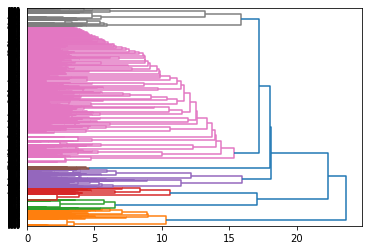

In [541]:
dn = dendrogram(link, orientation = "right")

In [542]:
data_test_users_clusters = data_test_users.copy()

In [543]:
data_test_users_clusters["cluster"] = fcluster(link, 4)

In [544]:
data_test_users_clusters.groupby('cluster').mean()

,index,34,51,20,81,64,7,72,5,13,...,160,176,224,17,104,123,220,147,153,183
cluster,,,,,,,,,,,,,,,,,,,,,
1,68707.828671,0.066228,0.056561,0.052859,0.003497,0.002674,0.106746,0.029206,0.050185,0.028589,...,0.000617,0.000617,0.000411,0.000411,0.001234,0.000411,0.000411,0.000206,0.000206,0.000206


In [545]:
data_test_users_clusters.groupby('cluster').size()

cluster
1    4862
dtype: int64

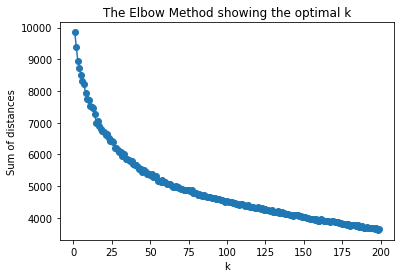

In [462]:
K = range(1, 200)
models = [KMeans(n_clusters=k, random_state=42).fit(data_test_users_clusters.drop("index", axis=1)) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [546]:
data_test_users_clusters.columns

Index([  'index',        34,        51,        20,        81,        64,
               7,        72,         5,        13,
       ...
             176,       224,        17,       104,       123,       220,
             147,       153,       183, 'cluster'],
      dtype='object', length=173)

In [839]:
model = KMeans(n_clusters=20, random_state=42)
model.fit(data_test_users_clusters.drop("index", axis=1))
data_test_users_clusters['cluster'] = model.labels_
data_test_users_clusters.drop("index", axis=1).groupby('cluster').mean().to_csv("clusters.csv")


In [840]:
data_test_users_clusters.drop(["index", "cluster"], axis=1).columns

Index([ 34,  51,  20,  81,  64,   7,  72,   5,  13, 134,
       ...
       160, 176, 224,  17, 104, 123, 220, 147, 153, 183],
      dtype='object', length=171)

In [841]:
data_test_users_clusters.groupby('cluster').size()

cluster
0     209
1      72
2     809
3     169
4     318
5       1
6     324
7     289
8     747
9     270
10     16
11    354
12     19
13    142
14    325
15    187
16    116
17    122
18     81
19    292
dtype: int64

In [842]:
data_test_users_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Columns: 173 entries, index to cluster
dtypes: int32(1), object(172)
memory usage: 6.4+ MB


In [843]:
courses_by_clusters = {i: [] for i in data_test_users_clusters.cluster.unique()}

In [844]:
pprint(courses_by_clusters)

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: []}


In [845]:
# for i in data_test_users_clusters.cluster.unique():
clusters = []
for i in data_test_users_clusters.loc[data_test_users_clusters.cluster == 0].drop(["index", "cluster"], axis=1):
    for j in data_test_users_clusters.drop(["index", "cluster"], axis=1)[i]:
        if j == 1:
            clusters.append(i)
    print(i)

34
51
20
81
64
7
72
5
13
134
10
117
238
172
119
3
15
227
1
115
188
114
91
9
71
73
8
171
202
29
18
204
101
228
90
107
164
189
25
116
85
190
191
103
14
92
75
43
23
167
144
74
97
137
28
146
22
77
178
32
148
165
212
111
177
56
127
149
110
145
94
198
50
108
129
109
151
40
33
41
121
21
142
6
124
99
150
199
76
27
194
12
184
173
24
180
30
100
169
102
138
130
174
86
196
78
26
136
133
158
215
106
229
195
80
143
205
131
217
221
87
246
59
213
163
140
235
125
93
200
69
170
154
16
19
207
159
166
135
237
68
225
88
141
234
161
139
126
112
168
162
192
181
120
31
252
132
206
219
222
58
160
176
224
17
104
123
220
147
153
183


In [846]:
set(clusters)

{1,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 40,
 41,
 43,
 50,
 51,
 56,
 58,
 59,
 64,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 123,
 124,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 154,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 176,
 177,
 178,
 180,
 181,
 183,
 184,
 188,
 189,
 190,
 191,
 192,
 194,
 195,
 196,
 198,
 199,
 200,
 202,
 204,
 205,
 206,
 207,
 212,
 213,
 215,
 217,
 219,
 220,
 221,
 222,
 224,
 225,
 227,
 228,
 229,
 234,
 235,
 237,
 238,
 246,
 252}

In [847]:
data_all_users = {i: [] for i in answer.index}
for i in answer.index:
    data_loc = data.loc[data.user_id == i].course_id
    data_all_users[i] += list(data_loc)
pprint(data_all_users)

{78: [100],
 81: [34, 188, 1, 74],
 120: [1, 129],
 123: [],
 150: [167],
 170: [20],
 171: [9, 3],
 188: [94, 7, 154, 24, 207, 1, 23, 81, 150, 31, 151],
 246: [18, 34],
 259: [3],
 296: [],
 307: [5, 189, 86, 108, 1, 15],
 309: [1, 129, 34, 85, 178],
 328: [20, 3],
 340: [129, 92, 1, 171],
 343: [1, 14],
 344: [],
 356: [16, 25, 34, 85, 108, 129],
 361: [1],
 363: [],
 368: [15, 34, 1],
 374: [34, 1],
 396: [18, 14],
 406: [7, 15],
 460: [],
 488: [],
 513: [1, 189],
 526: [9, 171, 194, 20, 74, 1, 34],
 529: [7, 221, 15, 127, 1, 13, 131, 34, 137, 114, 177],
 545: [1, 92],
 548: [43, 18, 20, 1],
 549: [],
 555: [9, 1],
 556: [15, 127, 85],
 563: [],
 566: [92, 18],
 570: [111, 1],
 581: [34, 51, 18],
 582: [129, 34, 13, 1],
 597: [1, 43, 76, 51, 177, 15, 92, 40],
 606: [51, 20],
 612: [1, 80],
 613: [108, 18, 91, 34, 20, 14, 51, 92],
 616: [14, 9, 7, 1],
 626: [92, 1, 91, 134],
 680: [1, 34],
 693: [],
 704: [],
 723: [34, 21, 77, 99, 24, 43, 3, 7, 90, 100, 81, 188, 1, 106],
 727: [85,

In [848]:
all_courses = list(data.course_id.unique())
print(all_courses == list(data_test_users_clusters.drop(["index", "cluster"], axis=1).columns))
def get_cluster(complited: list):
    global data123
    for_cluster = {i: 0 for i in all_courses}
    for i in all_courses:
        if i in complited:
            for_cluster[i] = 1
    data123 = pd.DataFrame(columns=all_courses)
    data123 = data123.append(for_cluster, ignore_index=True)
    print(data123.reset_index(drop=1))
    return model.predict(data123.reset_index())[0]


True


In [849]:
data_ = []

In [850]:
for i in data_all_users.keys():
    data_.append(get_cluster(data_all_users[i]))

  34  51  20  81  64  7   72  5   13  134  ... 160 176 224 17  104 123 220  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

  147 153 183  
0   0   0   0  

[1 rows x 171 columns]
  34  51  20  81  64  7   72  5   13  134  ... 160 176 224 17  104 123 220  \
0   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

  147 153 183  
0   0   0   0  

[1 rows x 171 columns]
  34  51  20  81  64  7   72  5   13  134  ... 160 176 224 17  104 123 220  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

  147 153 183  
0   0   0   0  

[1 rows x 171 columns]
  34  51  20  81  64  7   72  5   13  134  ... 160 176 224 17  104 123 220  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

  147 153 183  
0   0   0   0  

[1 rows x 171 columns]
  34  51  20  81  64  7   72  5   13  134  ... 160 176 224 17  104 123 220  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0

In [851]:
from collections import Counter

In [852]:
list(data_all_users.values()).count([])

968

In [853]:
Counter(data_)

Counter({7: 2737, 10: 96, 15: 33, 17: 22, 16: 12})

In [880]:
top = {i: 0 for i in data.course_id.unique()}

In [881]:
for i in top.keys():
    top[i] = len(data.loc[data.course_id == i].values)

In [884]:
top = dict(sorted(top.items(), key=lambda item: item[1], reverse=True))

In [885]:
top

{7: 519,
 1: 510,
 15: 498,
 34: 322,
 3: 304,
 51: 275,
 114: 270,
 108: 259,
 20: 257,
 8: 256,
 5: 244,
 43: 225,
 40: 210,
 85: 191,
 25: 174,
 74: 160,
 121: 158,
 23: 149,
 72: 142,
 29: 142,
 13: 139,
 86: 137,
 110: 136,
 92: 133,
 134: 132,
 77: 132,
 188: 126,
 10: 124,
 109: 118,
 32: 112,
 101: 111,
 91: 110,
 33: 107,
 24: 104,
 75: 99,
 103: 97,
 117: 86,
 116: 85,
 144: 85,
 97: 82,
 9: 80,
 14: 79,
 142: 78,
 90: 74,
 18: 73,
 137: 71,
 129: 71,
 28: 66,
 127: 66,
 73: 65,
 171: 60,
 99: 57,
 130: 55,
 148: 54,
 167: 52,
 111: 51,
 172: 46,
 145: 46,
 198: 44,
 151: 43,
 189: 42,
 146: 39,
 178: 39,
 138: 38,
 106: 38,
 195: 38,
 202: 36,
 190: 35,
 177: 34,
 100: 33,
 165: 31,
 194: 31,
 173: 27,
 94: 26,
 143: 26,
 169: 25,
 131: 25,
 115: 24,
 184: 24,
 71: 23,
 204: 23,
 102: 22,
 93: 22,
 191: 21,
 21: 21,
 180: 21,
 238: 20,
 76: 20,
 119: 19,
 107: 19,
 164: 19,
 50: 19,
 59: 19,
 19: 19,
 227: 18,
 212: 18,
 81: 17,
 199: 17,
 12: 17,
 125: 16,
 170: 16,
 228: 1

In [886]:
data_all_users = {i: [] for i in answer.index}
for i in answer.index:
    data_loc = data.loc[data.user_id == i].course_id
    data_all_users[i] += list(data_loc)

In [887]:
data_all_users

{78: [100],
 81: [34, 188, 1, 74],
 120: [1, 129],
 123: [],
 150: [167],
 170: [20],
 171: [9, 3],
 188: [94, 7, 154, 24, 207, 1, 23, 81, 150, 31, 151],
 246: [18, 34],
 259: [3],
 296: [],
 307: [5, 189, 86, 108, 1, 15],
 309: [1, 129, 34, 85, 178],
 328: [20, 3],
 340: [129, 92, 1, 171],
 343: [1, 14],
 344: [],
 356: [16, 25, 34, 85, 108, 129],
 361: [1],
 363: [],
 368: [15, 34, 1],
 374: [34, 1],
 396: [18, 14],
 406: [7, 15],
 460: [],
 488: [],
 513: [1, 189],
 526: [9, 171, 194, 20, 74, 1, 34],
 529: [7, 221, 15, 127, 1, 13, 131, 34, 137, 114, 177],
 545: [1, 92],
 548: [43, 18, 20, 1],
 549: [],
 555: [9, 1],
 556: [15, 127, 85],
 563: [],
 566: [92, 18],
 570: [111, 1],
 581: [34, 51, 18],
 582: [129, 34, 13, 1],
 597: [1, 43, 76, 51, 177, 15, 92, 40],
 606: [51, 20],
 612: [1, 80],
 613: [108, 18, 91, 34, 20, 14, 51, 92],
 616: [14, 9, 7, 1],
 626: [92, 1, 91, 134],
 680: [1, 34],
 693: [],
 704: [],
 723: [34, 21, 77, 99, 24, 43, 3, 7, 90, 100, 81, 188, 1, 106],
 727: [85,

In [890]:
def get_the_bests(complited):
    result = []
    count = 0
    for i in top.keys():
        if i not in complited:
            result.append(i)
            count += 1
        if count == 3:
            return result

In [891]:
for i in list(data_all_users.keys()):
    print(i)
    answer.loc[i, ["course_id_1", "course_id_2", "course_id_3"]] = get_the_bests(data_all_users[i])

78
81
120
123
150
170
171
188
246
259
296
307
309
328
340
343
344
356
361
363
368
374
396
406
460
488
513
526
529
545
548
549
555
556
563
566
570
581
582
597
606
612
613
616
626
680
693
704
723
727
800
805
812
828
843
849
894
901
904
969
1038
1100
1104
1158
1279
1286
1338
1352
1356
1361
1393
1395
1456
1466
1478
1483
1491
1516
1570
1573
1596
1631
1644
1650
1667
1697
1702
1710
1716
1717
1722
1730
1736
1737
1759
1762
1774
1776
1804
1844
1866
1894
1900
1954
1979
2003
2011
2016
2036
2093
2145
2149
2169
2243
2245
2287
2290
2340
2354
2376
2422
2451
2459
2465
2509
2622
2633
2639
2647
2667
2675
2679
2680
2684
2724
2725
2755
2762
2763
2785
2819
2820
2860
2888
2908
2918
2932
2949
2960
2994
3017
3018
3025
3091
3105
3110
3117
3127
3139
3167
3177
3189
3193
3260
3359
3397
3399
3408
3414
3452
3475
3479
3480
3487
3492
3497
3516
3529
3532
3550
3590
3591
3611
3618
3629
3662
3675
3698
3769
3809
3811
3816
3821
3865
3871
3915
3942
3962
3966
3972
3995
4012
4025
4042
4079
4111
4127
4128
4129
4156
4181
4182
42

In [893]:
answer.to_csv("answer.csv")